In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical # one-hot encoding과 같은 결과 반환


from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
#CNN을 실행하기 위한 데이터 reshape
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')/255

#데이터 정규화
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [10]:
# CNN 신경망 설정
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (28,28,1), activation = 'relu')) #커넬 개수 32, 사이즈 (3,3)
model.add(Conv2D(64,kernel_size = (3,3), activation = 'relu')) #커넬 개수 64개
model.add(MaxPooling2D(pool_size = (2,2))) #풀링 사이즈 (2,2) -> 50% 줄어듬
model.add(Dropout(0.25)) #노드를 25% 꺼줌(계산안함)

#Dense 실행 -> 1차원으로 데이터 차원을 변경
model.add(Flatten()) #(28,28,1) -> (28*28*1)
model.add(Dense(128,activation = 'relu' ))
model.add(Dropout(0,5))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                      

In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
#모델 최적화를 위한 설정
model_path = './data/model/MNIST_CNN.hdf5'
checkpointer = ModelCheckpoint(filepath = model_path, monitor = 'val_loss',
                               verbose = 1, save_best_only =True)

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10)

hist = model.fit(X_train, y_train, epochs = 2000,
                 validation_split = 0.25, batch_size = 200, verbose = 0,
                 callbacks = [early_stopping, checkpointer])

#테스트 정확도 출력
print("Test accuracy :", model.evaluate(X_test, y_test)[1])


Epoch 1: val_loss improved from inf to 0.34571, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.34571 to 0.27468, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.27468 to 0.23564, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.23564 to 0.20396, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.20396 to 0.17472, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.17472 to 0.15329, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.15329 to 0.14332, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.14332 to 0.13525, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 9: val_loss improved from 0.13525 to 0.13253, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 10: val_loss improved from 0.13253 to 0.12911, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 11: val_loss did not impro

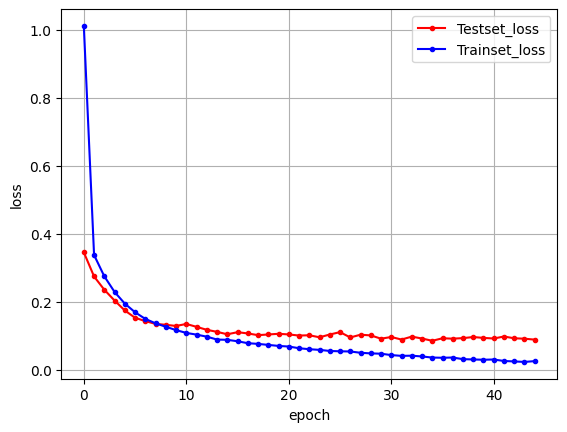

In [12]:
import matplotlib.pyplot as plt
import numpy as np

y_vloss = hist.history['val_loss']

#학습셋의 오차
y_loss = hist.history['loss']

#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
X_test.shape

(10000, 28, 28, 1)